<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2023, Day 5 </h1> 
<h3 align="center"> August 24, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> The Questions </h2>
    
<p> The first week of the course is devoted to question focused workshops and addresing those questions with datasets and computational methods that we will present.  Each day will be devoted to its own question.  
    
<p> For reference, the questions (as they are currently formulated) are
<ul>
<li> Day 1:  How do single neurons encode information about the external world?  
<li> Day 2:  How do populations of neurons encode information about the external world? 
<li> Day 3:  How do cell type and circuit architecture contribute to physiological function?
<li> Day 4:  What is a behavioral state and how can we define it? 
<b><li> Day 5:  How does network structure lead to network dynamics?</b>
</ul>

## Credit
[Visual Behavior Neuropixels Quickstart](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_neuropixels_quickstart.html) \
[Visual_Behavior_Neuropixels_SWDB_2022](https://github.com/AllenInstitute/swdb_2022/blob/main/DynamicBrain/Visual_Behavior_Neuropixels_SWDB_2022.ipynb)

## Import dependencies

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # Useful tool to arrange multiple plots in one figure (https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)
%matplotlib inline

import torch # to determine if we can do away with it
import seaborn as sns


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## (Down)load VBN data set
The main entry point to the VBN dataset is the <code>VisualBehaviorNeuropixelsProjectCache</code> class. This class is responsible for downloading any requested data or metadata as needed and storing it in well known locations. For this workshop, all of the data has been preloaded onto the hard drives you have received, and is available on AWS.

We begin by specifying our data cache directory. Then we'll import the <code>VisualBehaviorNeuropixelsProjectCache</code> class and instantiate it.

In [2]:
from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

In [3]:
# download/ load the data set
output_dir = "/src/swdb_2023/Day5/data"

# download from s3
#cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(
#            cache_dir=Path(output_dir))

# load from pre-downloaded cache
use_static = False
cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(
            cache_dir=output_dir, use_static_cache=use_static)

In [7]:
# get the metadata tables
units_table = cache.get_unit_table()
channels_table = cache.get_channel_table()
probes_table = cache.get_probe_table()
behavior_sessions_table = cache.get_behavior_session_table()
ecephys_sessions_table = cache.get_ecephys_session_table()

## VBN data set 101
3 genotypes (C57BL6J, VIP-IRES-CrexAi32 and SST-IRES-CrexAi32) \
For each mouse, two recordings were made on consecutive days. One of these sessions used the image set that was familiar to the mouse from training. The other session used a novel image set containing two familiar images from training and six new images that the mouse had never seen.

### Session table

In [4]:
# Session table and filtering
# The ecephys_sessions_table contains metadata for every Neuropixels recording session
# This will be the main metadata table we'll use to filter sessions for analysis
# Let's look at what's in it (note: you can find a short description of every column in the cheat sheet)

ecephys_sessions_table = cache.get_ecephys_session_table()
ecephys_sessions_table.head()

,behavior_session_id,date_of_acquisition,equipment_name,session_type,mouse_id,genotype,sex,project_code,age_in_days,unit_count,...,channel_count,structure_acronyms,image_set,prior_exposures_to_image_set,session_number,experience_level,prior_exposures_to_omissions,file_id,abnormal_histology,abnormal_activity
ecephys_session_id,,,,,,,,,,,,,,,,,,,,,
1044385384,1044408432,2020-08-19 14:47:08.574000+00:00,NP.1,EPHYS_1_images_G_5uL_reward,524761,wt/wt,F,NeuropixelVisualBehavior,151,2179.0,...,1920.0,"['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'LGv...",G,30.0,1,Familiar,0,870,NaN,NaN
1044594870,1044624428,2020-08-20 15:03:56.422000+00:00,NP.1,EPHYS_1_images_H_5uL_reward,524761,wt/wt,F,NeuropixelVisualBehavior,152,2103.0,...,1920.0,"['CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg', 'HPF...",H,0.0,2,Novel,1,872,NaN,NaN
1047969464,1048005547,2020-09-02 14:53:14.347000+00:00,NP.1,EPHYS_1_images_G_3uL_reward,509808,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,263,2438.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",G,62.0,1,Familiar,0,877,NaN,NaN
1047977240,1048009327,2020-09-02 15:15:03.733000+00:00,NP.0,EPHYS_1_images_G_3uL_reward,524925,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,NeuropixelVisualBehavior,165,1856.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",G,51.0,1,Familiar,0,878,NaN,NaN
1048189115,1048221709,2020-09-03 14:16:57.913000+00:00,NP.1,EPHYS_1_images_H_3uL_reward,509808,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,264,1925.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,879,NaN,NaN


This table gives us lots of useful metadata about each recording session, including when the session took place, the `genotype`, `sex` and `age` of the mouse that was run, what brain areas were recorded and some important info about the stimulus. 

To demystify a few of these columns, let's briefly review the experimental design. Each mouse was trained with one of two image sets (`G` or `H`). The image set the mouse was trained with became highly familiar because each of the images was seen thousands of times. The image set the mouse was not trained with was observed for the first time during a Neuropixels recording session after the mouse had learned the task. 
    
For the majority of mice, we recorded two sessions: one with the trained `Familiar` image set and one with a `Novel` image set. Note that two of the eight images were shared across these two image sets as diagrammed below for an example mouse that was trained with image set `G`. 

<div>
<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/f1/d1/f1d140bc-228a-4328-bdca-e3383a1a46f0/image_sets_and_training_trajectories_diagram_defaultsdk_and_unfiltered.png", width="900"/>
</div>

In [6]:
# num of sessions for each type: novel v. familiar
ecephys_sessions_table.value_counts('experience_level')

experience_level
Novel       52
Familiar    51
dtype: int64

In [7]:
# num of sessions for each type: G v. H
ecephys_sessions_table.value_counts('image_set')

image_set
H    52
G    51
dtype: int64

In [8]:
# num of sessions for each type: novel v. familiar for each image set
ecephys_sessions_table.value_counts(['experience_level', 'image_set'])

experience_level  image_set
Novel             H            42
Familiar          G            41
                  H            10
Novel             G            10
dtype: int64

In [9]:
# num of unique genotypes
# num of sessions of each genotype

ecephys_sessions_table.value_counts('genotype')

genotype
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt    43
wt/wt                                            38
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt    22
dtype: int64

### Single session

In [9]:
# example: grab a session from an SST mouse during a novel session

sst_novel_sessions = ecephys_sessions_table.loc[
                        (ecephys_sessions_table['genotype'].str.contains('Sst')) & 
                        (ecephys_sessions_table['experience_level']=='Novel')]
sst_novel_sessions.head()

,behavior_session_id,date_of_acquisition,equipment_name,session_type,mouse_id,genotype,sex,project_code,age_in_days,unit_count,...,channel_count,structure_acronyms,image_set,prior_exposures_to_image_set,session_number,experience_level,prior_exposures_to_omissions,file_id,abnormal_histology,abnormal_activity
ecephys_session_id,,,,,,,,,,,,,,,,,,,,,
1048189115,1048221709,2020-09-03 14:16:57.913000+00:00,NP.1,EPHYS_1_images_H_3uL_reward,509808,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,264,1925.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,879,NaN,NaN
1048196054,1048222325,2020-09-03 14:25:07.290000+00:00,NP.0,EPHYS_1_images_H_3uL_reward,524925,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,NeuropixelVisualBehavior,166,2288.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,880,NaN,NaN
1053941483,1053960987,2020-10-01 17:03:58.362000+00:00,NP.1,EPHYS_1_images_H_3uL_reward,527749,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,180,1543.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,891,NaN,NaN
1064644573,1064666428,2020-11-19 15:18:01.372000+00:00,NP.1,EPHYS_1_images_H_3uL_reward,544456,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,120,2254.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,909,NaN,NaN
1065905010,1065929713,2020-11-24 14:21:48.847000+00:00,NP.0,EPHYS_1_images_H_3uL_reward,544358,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,NeuropixelVisualBehavior,126,1998.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1,912,NaN,NaN


<div>
<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/d2/4d/d24d67b2-59ee-4246-b4a4-621877ba9e5f/vbn_session_object_summary.png"/>
</div>

In [11]:
# grab single session
session_id = 1064644573
session = cache.get_ecephys_session(ecephys_session_id=session_id)
# ISSUE: huge ephys data set - 3G for this session, 2 min download

# get high-level summary of the session by accessing its "metadata" attribute
session.metadata

{'equipment_name': 'NP.1',
 'sex': 'M',
 'age_in_days': 120,
 'stimulus_frame_rate': 60.0,
 'session_type': 'EPHYS_1_images_H_3uL_reward',
 'date_of_acquisition': datetime.datetime(2020, 11, 19, 23, 18, 1, tzinfo=tzlocal()),
 'reporter_line': 'Ai32(RCL-ChR2(H134R)_EYFP)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': None,
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '544456',
 'project_code': 'Not Available',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'behavior_session_id': 1064666428,
 'ecephys_session_id': 1064644573}

### Stimulus presentations

Every recording session consisted of three major visual stimulus epochs in the following order (diagrammed below):

- An active behavior session during which the mouse performed the change detection task
- Receptive field mapping and full-field flash stimuli
- Passive replay of stimulus shown during active behavior, but without the lickspout so the mouse can no longer respond.

<div>
<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/84/46/84463f18-1b45-4f4d-854f-767fac4f7126/experimental_session_diagram.png", width="900"/>
</div>

In [12]:
stimulus_presentations = session.stimulus_presentations
stimulus_presentations.head()

,active,color,contrast,duration,end_frame,flashes_since_change,image_name,is_change,is_image_novel,omitted,...,rewarded,spatial_frequency,start_frame,start_time,stimulus_block,stimulus_index,stimulus_name,end_time,temporal_frequency,trials_id
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,True,NaN,NaN,0.250203,75,0.0,im104_r,False,True,False,...,False,NaN,60,26.516655,0,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,26.766858,NaN,0
1,True,NaN,NaN,0.250203,120,1.0,im104_r,False,True,False,...,False,NaN,105,27.267263,0,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,27.517466,NaN,0
2,True,NaN,NaN,0.250212,165,2.0,im104_r,False,True,False,...,False,NaN,150,28.017890,0,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,28.268103,NaN,1
3,True,NaN,NaN,0.250200,210,3.0,im104_r,False,True,False,...,False,NaN,195,28.768515,0,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,29.018715,NaN,1
4,True,NaN,NaN,0.250220,255,4.0,im104_r,False,True,False,...,False,NaN,240,29.519116,0,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,29.769336,NaN,1


This table is a record of every stimulus presented to the mouse over the course of the experiment. Different stimuli are indexed by the <code>stimulus_block</code> column. Let's group this dataframe by <code>stimulus_block</code> and see what stimulus was shown for each block

In [13]:
stimulus_block_grouped = stimulus_presentations.groupby('stimulus_block')
stimulus_block_grouped.count()

,active,color,contrast,duration,end_frame,flashes_since_change,image_name,is_change,is_image_novel,omitted,...,position_y,rewarded,spatial_frequency,start_frame,start_time,stimulus_index,stimulus_name,end_time,temporal_frequency,trials_id
stimulus_block,,,,,,,,,,,,,,,,,,,,,
0,4797,0,0,4619,4797,4797,4797,4797,4619,4797,...,0,4797,0,4797,4797,0,4797,4797,0,4797
1,1,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,1
2,3645,0,3645,3645,3645,0,0,0,0,0,...,3645,0,3645,3645,3645,3645,3645,3645,3645,3645
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,1
4,150,150,150,150,150,0,0,0,0,0,...,0,0,0,150,150,150,150,150,0,150
5,4797,0,0,4797,4797,4797,4797,4797,4619,4797,...,0,4797,0,4797,4797,0,4797,4797,0,4797


In [14]:
# look at the first row for each block
stimulus_block_grouped.head(1).reset_index()

,stimulus_presentations_id,active,color,contrast,duration,end_frame,flashes_since_change,image_name,is_change,is_image_novel,...,rewarded,spatial_frequency,start_frame,start_time,stimulus_block,stimulus_index,stimulus_name,end_time,temporal_frequency,trials_id
0,0,True,NaN,NaN,0.250203,75,0.0,im104_r,False,True,...,False,NaN,60,26.516655,0,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,26.766858,NaN,0
1,4797,False,NaN,NaN,10.008360,216606,NaN,NaN,<NA>,<NA>,...,<NA>,NaN,216006,3647.110878,1,NaN,spontaneous,3657.119238,NaN,-1
2,4798,False,NaN,0.8,0.250211,216621,NaN,NaN,<NA>,<NA>,...,<NA>,0.08,216606,3657.119238,2,0.0,gabor_20_deg_250ms,3657.369449,4.0,-1
3,8443,False,NaN,NaN,288.991546,288606,NaN,NaN,<NA>,<NA>,...,<NA>,NaN,271281,4569.131563,3,NaN,spontaneous,4858.123108,NaN,-1
4,8444,False,-1.0,0.8,0.250208,288621,NaN,NaN,<NA>,<NA>,...,<NA>,NaN,288606,4858.123108,4,1.0,flash_250ms,4858.373316,NaN,-1
5,8594,False,NaN,NaN,0.250211,307281,0.0,im104_r,False,True,...,False,NaN,307266,5181.676868,5,NaN,Natural_Images_Lum_Matched_set_ophys_H_2019,5181.927079,NaN,0


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

This shows us the structure of this experiment (and every experiment in this dataset). There are 5 stimulus blocks as follows:

**block 0**: Change detection task. Natural images are flashed repeatedly and the mouse is rewarded for licking when the identity of the image changes. You can find more info about this task [here](http://portal.brain-map.org/explore/circuits/visual-behavior-neuropixels?edit&language=en).

**block 1**: Brief gray screen (10 seconds)

**block 2**: Receptive field mapping using gabor stimuli. For more details on this stimulus consult [this notebook](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_receptive_fields.html).

**block 3**: Longer gray screen (5 minutes)

**block 4**: Full-field flashes, shown at 80% contrast. Flashes can be black (color = -1) or white (color = 1). This stimulus is useful for calculating response latencies and current source density analysis for layer identification.

**block 5**: Passive replay. Frame-for-frame replay of the stimulus shown during the change detection task (block 0), but now with the lick spout retracted so the animal can no longer engage in the task.

    
For now, we will focus on block 0 and 5, the active behavior and the passive replay of the same images.

Let's confirm that the active behavior block (0) and the passive replay block (5) match frame for frame:

In [27]:
# get unique images
stimulus_block_grouped.get_group(0)['image_name'].unique()
stimulus_block_grouped.get_group(5)['image_name'].unique()

array(['im104_r', 'im024_r', 'im114_r', 'im083_r', 'omitted', 'im111_r',
       'im005_r', 'im034_r', 'im087_r'], dtype=object)

In [30]:
# num of image changes
# What if you limit the count to the active behavior session?

stimulus_presentations[(stimulus_presentations['stimulus_block']==0) | 
                       (stimulus_presentations['stimulus_block']==5)]['is_change'].sum()

stimulus_presentations[(stimulus_presentations['stimulus_block']==0)]['is_change'].sum()

# alternatively
#stimulus_presentations.is_change.sum()
#stimulus_presentations[stimulus_presentations['active']].is_change.sum()

205

### Units & Channels
filter the data for units in a particular brain region or for units that meet specific quality criteria

In [31]:
# Units table: contains quality metrics and waveform metrics
# for every unit recorded during this session
units = session.get_units()
units.head()

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,...,presence_ratio,quality,recovery_slope,repolarization_slope,silhouette_score,snr,spread,velocity_above,velocity_below,waveform_duration
id,,,,,,,,,,,,,,,,,,,,,
1066255651,0.383040,118.649700,0.299635,226,339.62,4.451595,2.821133,0.612185,66.317325,0.005903,...,0.99,good,-0.043068,0.326467,0.087238,1.827667,70.0,1.510888,-1.716918,0.686767
1066255433,0.610655,597.420330,0.484983,9,178.42,3.998035,18.928205,0.138286,61.015923,0.035420,...,0.93,good,-0.651767,2.146121,0.167403,4.371932,30.0,0.000000,0.000000,0.178559
1066255560,0.683373,556.718760,0.000106,137,260.11,8.377408,36.904606,0.004847,391.105599,0.000004,...,0.99,good,-0.557754,1.669701,0.111664,3.584407,70.0,0.549414,-0.343384,0.384590
1066255513,0.687708,336.671985,0.500000,89,263.52,4.100477,8.528180,0.722801,46.973569,0.019575,...,0.99,good,-0.458552,1.333007,0.061565,1.860639,130.0,0.000000,0.194584,0.178559
1066255736,0.836807,118.914120,0.257362,309,497.94,2.890503,0.806622,1.026560,30.087944,0.087641,...,0.99,noise,-0.020434,0.193150,0.159898,1.718425,130.0,-0.732552,-1.716918,0.631826


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

For more information about many of the metrics included in this table and how to use them to guide your analysis, see our [quality metrics tutorial](https://allensdk--2471.org.readthedocs.build/en/2471/_static/examples/nb/visual_behavior_neuropixels_quality_metrics.html). For now, here's a brief description of each column:

**INDEX**: Unique identifier for each unit. This will be the key to the session waveforms, spike_amplitudes and spike_times dictionaries.

**Waveform metrics**: Look [here](https://github.com/AllenInstitute/ecephys_spike_sorting/tree/master/ecephys_spike_sorting/modules/mean_waveforms) for more detail on these metrics and the code that computes them. For the below descriptions the '1D waveform' is defined as the waveform on the peak channel. The '2D waveform' is the waveform across channels centered on the peak channel.

`peak_channel_id`:                      channel ID for the channel on which unit's waveform had the largest amplitude  
`amplitude`:                            Peak to trough amplitude for mean 1D waveform in microvolts   
`waveform_duration`:                    Time from trough to peak for 1D waveform in milliseconds     
`waveform_halfwidth`:                   Width of 1D waveform at half-amplitude in milliseconds  
`PT_ratio`:                             Ratio of the max (peak) to the min (trough) amplitudes for 1D waveform  
`recovery_slope`:                       Slope of recovery of 1D waveform to baseline after repolarization (coming down from peak)  
`repolarization_slope`:                 Slope of repolarization of 1D waveform to baseline after trough  
`spread`:                               Distance in microns along the shank of probe for which the spike amplitude was above 12% of the peak channel amplitude  
`velocity_above`:                       Slope of spike propagation velocity traveling in dorsal direction from soma (note to avoid infinite values, this is actaully the inverse of velocity: ms/mm)  
`velocity_below`:                       Slope of spike propagation velocity traveling in ventral direction from soma (note to avoid infinite values, this is actually the inverse of velocity: ms/mm)  
`snr`:                                  signal-to-noise ratio for 1D waveform        


**Quality metrics**: Look [here](https://github.com/AllenInstitute/ecephys_spike_sorting/tree/7e567a6fc3fd2fc0eedef750b83b8b8a0d469544/ecephys_spike_sorting/modules/quality_metrics) for more detail on these metrics and the code that computes them.

`amplitude_cutoff`:                     estimate of miss rate based on amplitude histogram (ie fraction of spikes estimated to have been below detection threshold)  
`cumulative_drift`:                     cumulative change in spike depth along probe throughout the recording  
`max_drift`:                            Maximum change in unit depth across recording  
`d_prime`:                              classification accuracy based on LDA  
`firing_rate`:                          Mean firing rate over entire recording  
`isi_violations`:                       Ratio of refractory violation rate to total spike rate  
`isolation_distance`:                   Distance to nearest cluster in Mahalanobis space   
`l_ratio`:                              The Mahalanobis distance and chi-squared inverse cdf are used to find the probability of cluster membership for each spike.  
`nn_hit_rate`:                          Fraction of nearest neighbors in PCA space for spikes in unit cluster that are also in unit cluster  
`nn_miss_rate`:                         Fraction of nearest neighbors for spikes outside unit cluster than are in unit cluster  
`presence_ratio`:                       Fraction of time during session for which a unit was spiking  
`silhouette_score`:                     Standard metric for cluster overlap, computed in PCA space    
`quality`:                              Label assigned based on waveform shape as described [here](https://github.com/AllenInstitute/ecephys_spike_sorting/tree/7e567a6fc3fd2fc0eedef750b83b8b8a0d469544/ecephys_spike_sorting/modules/noise_templates). Either 'good' for physiological waveforms or 'noise' for artifactual waveforms.



In [32]:
# Channels Table: where each channel was in the brain 
# as well as its relative position along the probe

channels = session.get_channels()
channels.head(3)

,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,filtering,left_right_ccf_coordinate,probe_channel_number,probe_horizontal_position,probe_id,probe_vertical_position,structure_acronym
id,,,,,,,,,
1066253026,8409.0,3748.0,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,7032.0,0,43,1064735071,20,APN
1066253027,8405.0,3740.0,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,7033.0,1,11,1064735071,20,APN
1066253028,8402.0,3732.0,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...,7034.0,2,59,1064735071,40,APN


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

**INDEX**: Unique identifier for each channel. This is the id used in the units `peak_channel_id` column.  
    
**General Metadata**  

`anterior_posterior_ccf_coordinate`:    CCF coord in the AP axis  
`dorsal_ventral_ccf_coordinate`:        CCF coord in the DV axis  
`left_right_ccf_coordinate`:            CCF coord in the left/right axis  
`structure_acronym`:                    CCF acronym for area to which unit was assigned  
`structure_id`:                         CCF structure ID for the area to which unit was assigned  
`probe_horizontal_position`:            Horizontal (perpindicular to shank) probe position of each unit's peak channel in microns  
`probe_vertical_position`:              Vertical (along shank) probe position of each unit's peak channel in microns  
`probe_channel_number`:                 Index of channel position on probe (0-383 with 0 at tip of probe)

In [33]:
# We want info from both the units and the channels table to filter the units, 
# we can merge them into one table with all of the relevant columns. 
# This merged table will include quality metrics and CCF locations for every unit. 
# Merge these dataframes will give us CCF coordinates for each unit

#units = session.get_units()
#channels = session.get_channels()
unit_channels = units.merge(channels, left_on='peak_channel_id', right_index=True)

In [34]:
# use the merged units/channels table to show how many units 
# were recorded in each brain area for this session

unit_channels.value_counts('structure_acronym')

structure_acronym
APN      304
CA1      295
DG       190
VISp     144
VISpm    134
VISl     118
VISal    106
MB       103
CA3      100
LP        99
VISam     96
VISrl     92
MGv       86
MRN       79
ProS      70
NB        56
PIL       56
POST      32
NOT       27
Eth       15
root      14
TH        11
SUB        9
HPF        9
MGd        7
POL        1
MGm        1
dtype: int64

### Spike Times
The spike times for every unit are stored in a dictionary called spike_times. The keys for this dictionary are the unit_ids (the index values from the units table).

In [36]:
spike_times = session.spike_times
list(spike_times.keys())[:10]

# grab the spike times for the first unit in the list
unit_spikes = spike_times[1066255651]
print(unit_spikes[:20])

[5.98419368 6.33329374 7.8530273  8.08112733 8.36366071 8.40826072
 8.43019405 8.46879406 8.47062739 8.53646074 8.59562741 8.62702742
 8.70942743 8.95989413 9.26479418 9.43466087 9.65399424 9.66856091
 9.71082758 9.79472759]


Text(0.5, 0, 'Time, seconds')

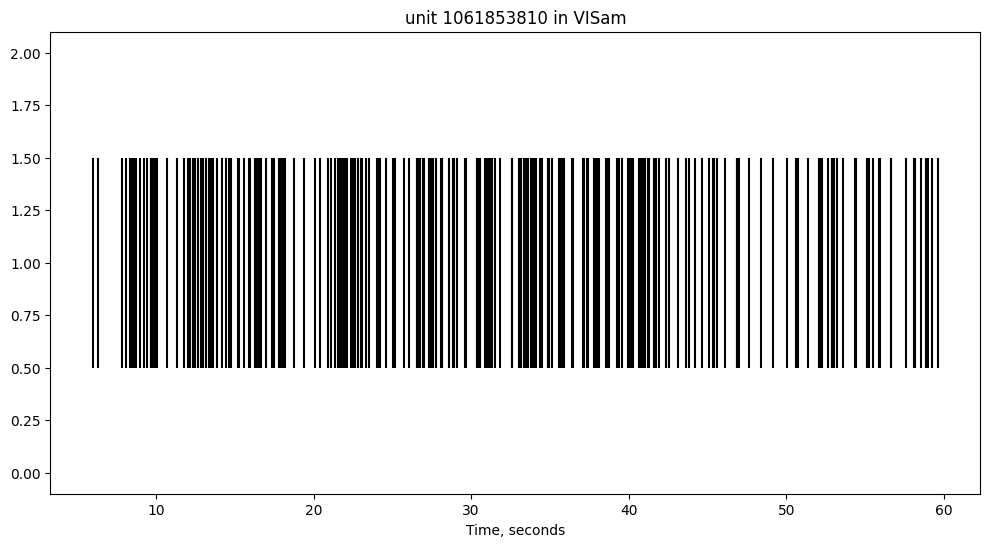

In [41]:
# Plot a raster of the spike times for unit 1066255651 over the first minute of the recording
# Where is this unit located? Put the unit id and the brain region in the plot title.

unit_id = 1066255651
# Get the brain region for this unit
unit_region = unit_channels.loc[unit_id].structure_acronym

#Get spike times for this unit
unit_spikes = spike_times[unit_id]

# Plot the raster for the first 60 seconds 
# (Hint: you can use matplotlibs "eventplot" to efficiently plot spike rasters)
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.eventplot(unit_spikes[unit_spikes<60], color='k')
ax.set_title(f'unit {1061853810} in {unit_region}')
ax.set_xlabel('Time, seconds')

### Spike waveforms
The waveform for each unit across all recording channels is stored in the session object as a dictionary called <code>mean_waveforms</code>

### Trials

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
       
Let's briefly review the timing of the change detection task (`stimulus_block` 0 or the `active` portion of the stimulus table). Remember the mouse is rewarded for licking to changes in the identity of a flashing natural image. 

* Each flash is 250 ms long with 500 ms of gray screen between images (ie, 750 ms from the start of flash *n* to the start of flash *n+1*). 

* Mice are rewarded for licking within a reward window defined as 150-750 ms after an image change. 

* Licks before the change abort the trial, and a new trial begins

* 5% of flashes can be omitted with the exception of 1) the flash immediately following an omission and 2) the flash immediately preceding a change which can't be omitted.

<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/e7/de/e7de5da4-a19f-4ef6-9bc3-3a5b088048ac/task_diagram.png"/>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

There are 5 possible ways each trial can be classified. Having a solid understanding of what these mean is vital to interpreting this data, so make sure you understand the diagram below and please ask questions if you're uncertain about anything:

<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/30/91/30919450-3121-4629-bf25-d2ab9e4f8b0d/doc_trial_classification_diagram.png"/>

In [42]:
trials = session.trials
trials.head()

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time_no_display_delay,go,catch,lick_times,response_time,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
trials_id,,,,,,,,,,,,,,,,,,,,
0,26.47193,27.45562,im104_r,im104_r,False,NaN,False,False,"[26.97173, 27.13853]",NaN,NaN,0.000,False,False,False,False,True,False,NaN,0.98369
1,27.97281,35.24574,im104_r,im024_r,True,30.97555,False,False,"[31.80908, 31.90917, 31.992300000000004, 32.10...",31.80908,31.12617,0.005,False,False,False,False,False,True,330.0,7.27293
2,35.47899,37.28095,im024_r,im024_r,False,NaN,False,False,"[36.73014, 36.96305]",NaN,NaN,0.000,False,False,False,False,True,False,NaN,1.80196
3,37.73082,39.51563,im024_r,im024_r,False,NaN,False,False,"[39.01525, 39.19819, 39.79894]",NaN,NaN,0.000,False,False,False,False,True,False,NaN,1.78481
4,39.98268,43.11863,im024_r,im024_r,False,NaN,False,False,"[42.63507, 42.81821, 43.35172, 43.58527]",NaN,NaN,0.000,False,False,False,False,True,False,NaN,3.13595


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Unlike the stimulus presentations table in which every row corresponded to a visual stimulus presentation, for the behavior trials table every row corresponds to one trial of the change detection task. Here is a quick summary of the columns:

`start_time`: Experiment time when this trial began in seconds.

`stop_time`: Experiment time when this trial ended.

`initial_image_name`: Indicates which image was shown before the change (or sham change) for this trial

`change_image_name`: Indicates which image was scheduled to be the change image for this trial. Note that if the trial is aborted, a new trial will begin before this change occurs.

`stimulus_change`: Indicates whether an image change occurred for this trial. 

`change_time_no_display_delay`: Experiment time when the task-control computer commanded an image change or sham change. This change time is used to determine the response window during which a lick will trigger a reward. Note that due to display lag, this is not the time when the change image actually appears on the screen. To get this time, you need the stimulus_presentations table (more about this below).

`go`: Indicates whether this trial was a 'go' trial. To qualify as a go trial, an image change must occur and the trial cannot be autorewarded.

`catch`: Indicates whether this trial was a 'catch' trial. To qualify as a catch trial, a 'sham' change must occur during which the image identity does not change. These sham changes are drawn to match the timing distribution of real changes and can be used to calculate the false alarm rate.

`lick_times`: A list indicating when the behavioral control computer recognized a lick. Note that the control computer records events at the stimulus refresh rate (60 Hz). Therefore these times are not identical to the lick times from the licks dataframe, which record when the licks were registered by the lick sensor, which is sampled at a much higher rate (100 kHz). The licks dataframe should generally be used for analysis of the licking behavior rather than these times.

`response_time`: Indicates the time when the first lick was registered by the task control software for trials that were not aborted (go or catch). NaN for aborted trials. For a more accurate measure of response time, the licks dataframe should be used.

`reward_time`: Indicates when the reward command was triggered for hit trials. NaN for other trial types. 

`reward_volume`: Indicates the volume of water dispensed as reward for this trial. 

`hit`: Indicates whether this trial was a 'hit' trial. To qualify as a hit, the trial must be a go trial during which the stimulus changed and the mouse licked within the response window (150-750 ms after the change time).

`false_alarm`: Indicates whether this trial was a 'false alarm' trial. To qualify as a false alarm, the trial must be a catch trial during which a sham change occurred and the mouse licked during the response window.

`miss`: To qualify as a miss trial, the trial must be a go trial during which the stimulus changed but the mouse did not lick within the response window.

`correct_reject`: To qualify as a correct reject trial, the trial must be a catch trial during which a sham change occurred and the mouse withheld licking.

`aborted`: A trial is aborted when the mouse licks before the scheduled change or sham change. On these trials, the change (sham change) never occurs and, instead, a new trial begins.

`auto_rewarded`: During autorewarded trials, the reward is automatically triggered after the change regardless of whether the mouse licked within the response window. These always come at the beginning of the session to help engage the mouse in behavior.

`change_frame`: Indicates the stimulus frame index when the change (on go trials) or sham change (on catch trials) occurred. 

`trial_length`: Duration of the entire trial in seconds.

In [43]:
# Get number of go trials
num_go = trials.go.sum()
print(f'Total go trials: {num_go}')

# Get number of hits
num_hits = trials.hit.sum()
print(f'Total hits: {num_hits}')

# Get hit rate
hit_rate = num_hits/num_go
print(f'Hit rate: {hit_rate}')


Total go trials: 202
Total hits: 79
Hit rate: 0.3910891089108911


## Exploratory analysis

### Unit PSTH

In [18]:
# Util

# Compute the PSTH
def make_PSTH(spikes, start_times, window_dur, bin_size=0.001):
    bins = np.arange(0, window_dur+bin_size, bin_size)
    counts = np.zeros(bins.size-1)
    for i, start in enumerate(start_times):
        start_ind = np.searchsorted(spikes, start)
        end_ind = np.searchsorted(spikes, start+window_dur)
        counts = counts + np.histogram(spikes[start_ind:end_ind]-start, bins)[0]
    
    counts = counts/start_times.size
    return counts/bin_size, bins

In [15]:
# Grab spike times and calculate the change response for 'good' units in V1
# Note: how you filter units will depend on your analysis
# Consult the unit metrics notebook for more details

# Sort the units by depth
unit_channels = unit_channels.sort_values('probe_vertical_position', ascending=False)

# Filter units by quality
good_unit_filter = ((unit_channels['snr']>1)&
                    (unit_channels['isi_violations']<1)&
                    (unit_channels['firing_rate']>0.1))

good_units = unit_channels.loc[good_unit_filter]
spike_times = session.spike_times

In [16]:
# Get the times when the image changes occurred from the stimulus presentations table 
# For now, we'll only take the image changes shown during the active behavior block

stimulus_presentations = session.stimulus_presentations
change_times = stimulus_presentations[stimulus_presentations['active'] &
                            stimulus_presentations['is_change']]['start_time'].values

In [25]:
stimulus_presentations['position_y']

stimulus_presentations_id
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13386   NaN
13387   NaN
13388   NaN
13389   NaN
13390   NaN
Name: position_y, Length: 13391, dtype: float64

In [20]:
# Include enough time to see three image responses: 
# the pre-change image response, 
# the change response and 
# the post-change response

# Loop through the units in the area of interest and compute PSTHs
area_of_interest = 'VISp'
area_change_responses = []
area_units = good_units[good_units['structure_acronym']==area_of_interest]
time_before_change = 1
duration = 2.5

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_change_response, bins = make_PSTH(unit_spike_times, 
                                          change_times-time_before_change, 
                                          duration, bin_size=0.01)
    area_change_responses.append(unit_change_response)
area_change_responses = np.array(area_change_responses)

Text(0, 0.5, 'Firing Rate')

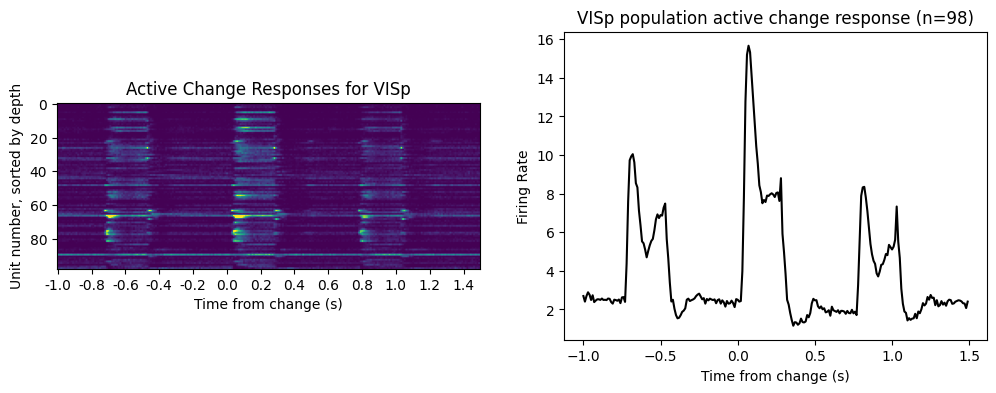

In [21]:
# Plot the results
fig, ax = plt.subplots(1,2)
fig.set_size_inches([12,4])

clims = [np.percentile(area_change_responses, p) for p in (0.1,99.9)]
im = ax[0].imshow(area_change_responses, clim=clims)
ax[0].set_title('Active Change Responses for {}'.format(area_of_interest))
ax[0].set_ylabel('Unit number, sorted by depth')
ax[0].set_xlabel('Time from change (s)')
ax[0].set_xticks(np.arange(0, bins.size-1, 20))
_ = ax[0].set_xticklabels(np.round(bins[:-1:20]-time_before_change, 2))

ax[1].plot(bins[:-1]-time_before_change, np.mean(area_change_responses, axis=0), 'k')
ax[1].set_title('{} population active change response (n={})'\
                .format(area_of_interest, area_change_responses.shape[0]))
ax[1].set_xlabel('Time from change (s)')
ax[1].set_ylabel('Firing Rate')

### Plot receptive fields


In [27]:
# Util
# find RF for single unit
def find_rf(spikes, xs, ys, rf_stim_table):
    unit_rf = np.zeros([ys.size, xs.size])
    for ix, x in enumerate(xs):
        for iy, y in enumerate(ys):
            stim_times = rf_stim_table[(rf_stim_table.position_x==x)
                                      &(rf_stim_table.position_y==y)]['start_time'].values
            unit_response, bins = make_PSTH(spikes, 
                                          stim_times+0.01, 
                                          0.2, bin_size=0.001)
            unit_rf[iy, ix] = unit_response.mean()

    return unit_rf

In [26]:
# Get stimulus presentation data for the receptive field mapping stimulus (gabors)

rf_stim_table = stimulus_presentations[stimulus_presentations['stimulus_name'].str.contains('gabor')]
# positions of gabor along azimuth
xs = np.sort(rf_stim_table.position_x.unique()) 
# positions of gabor along elevation
ys = np.sort(rf_stim_table.position_y.unique()) 

In [ ]:
area_rfs = []
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_rf = find_rf(unit_spike_times, xs, ys, rf_stim_table)
    area_rfs.append(unit_rf)

fig, axes = plt.subplots(int(len(area_rfs)/10)+1, 10)
fig.set_size_inches(12, 8)
for irf, rf in enumerate(area_rfs):
    ax_row = int(irf/10)
    ax_col = irf%10
    axes[ax_row][ax_col].imshow(rf, origin='lower')
for ax in axes.flat:
    ax.axis('off')

# Workshop 1: Visualizing and modeling the dynamic variability of a single neuron

## Variability in neural population responses
We will first take a look at exactly how variable neural population responses are by looking at each neuron's responses to visual stimuli.

Things ToDo:
1. Load visual behavior dataset
2. Extract responses of example neurons to identical visual stimuli and plot the histogram in responses
3. Repeat 2, but this time aligned relative to when the stimulus frame just changed
4. Repeat 3, but this time for unfamliar (first session when introduce) vs familiar (in later sessions)
5. If possible, condition the visualization on behavioral states from Day 4

## Predicting the neural responses

Here we will build models to predict the neural responses.

# Workshop 2: Visualizing and modeling the dynamic variability of a neural population

## Visual behavior dataset
1. Load visual behavior dataset
2. Predict neural population responses from visual stimuli (NOTE: this is no different then just running individual neuron prediction independently UNLESS noise model differs -> Exercise point)
3. Improve on neural population response prediction by including linear interaction with previous time-step neural population responses.
4. Assess the inferred interaction between neurons (based on weights). Can anything be said about the inferred functional connectivity?

## BONUS: Relating infererd neural interaction in models to 

## MIcRONS dataset

1. Perform neural population response fit and idetnify "functional" connectivity
2. Relate the functional connectivity to known connectivity

1. Load MICrONS dataset
2. Predict neural 